<a href="https://colab.research.google.com/github/nachiketaraina/ndvi_using_gee/blob/master/test_project.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [0]:
import ee
ee.Initialize()
import time
#from ipygee import *
#import  // ui ui has not been made available in python development enviroment as of yet
from IPython.display import Image
import folium
#adding ee_layer to folium to display maps
def add_ee_layer(self, ee_image_object, vis_params, name):
  map_id_dict = ee.Image(ee_image_object).getMapId(vis_params)
  folium.raster_layers.TileLayer(
    tiles = map_id_dict['tile_fetcher'].url_format,
    attr = 'Map Data &copy; <a href="https://earthengine.google.com/">Google Earth Engine</a>',
    name = name,
    overlay = True,
    control = True
  ).add_to(self)

folium.Map.add_ee_layer = add_ee_layer



In [36]:
!earthengine authenticate

Running command using Cloud API.  Set --no-use_cloud_api to go back to using the API

/usr/local/lib/python3.6/dist-packages/IPython/utils/traitlets.py:5: UserWarning: IPython.utils.traitlets has moved to a top-level traitlets package.
  warn("IPython.utils.traitlets has moved to a top-level traitlets package.")
To authorize access needed by Earth Engine, open the following URL in a web browser and follow the instructions. If the web browser does not start automatically, please manually browse the URL below.

    https://accounts.google.com/o/oauth2/auth?client_id=517222506229-vsmmajv00ul0bs7p89v5m89qs8eb9359.apps.googleusercontent.com&scope=https%3A%2F%2Fwww.googleapis.com%2Fauth%2Fearthengine+https%3A%2F%2Fwww.googleapis.com%2Fauth%2Fdevstorage.full_control&redirect_uri=urn%3Aietf%3Awg%3Aoauth%3A2.0%3Aoob&response_type=code&code_challenge=bhngYX_-zvB3zJl82b9iLW6OYbFnFxId0qWz6_60YcQ&code_challenge_method=S256

The authorization workflow will generate a code, which you should paste in 

In [0]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [0]:

from google.colab import auth
auth.authenticate_user()

In [0]:
a1 = ee.Feature(ee.Geometry.Point(13.8463669499,52.9008472902),{'label':'a1'})#selecting a random region
a2 = ee.Feature(ee.Geometry.Point(13.778028117,52.951728864),{'label ':'a2'})

In [0]:
cord = ee.FeatureCollection([a1,a2]) #making a feature collection

In [0]:
#function for computing nvdi from red and near infrared bands

def addNDVI2(image):
  ndvi = image.normalizedDifference(['B5','B4']).rename('NDVI2')
  return image.addBands(ndvi).float();


In [0]:
image_collection = ee.ImageCollection("LANDSAT/LC08/C01/T1_SR")# ('Quearing imageset for landsat-8 images')

In [0]:
time_series = image_collection.filterDate('2016-01-01','2018-12-30') #time_series over 2 years 
time_series= time_series.sort('system:time_start')

In [0]:
 #selecting netherland as random location
pathrow=time_series.filterBounds(cord)

In [0]:
clouds = pathrow.filter(ee.Filter.lt('CLOUD_COVER', 5))   #selecting images having less cloud cover than 5 percent

In [49]:
count = clouds.size()
print('Count: ', str(count.getInfo())+'\n')#size of collection of images

Count:  18



In [0]:
bands = clouds.select(['B4','B5'])

In [0]:
resultant_ndvi = bands.map(addNDVI2)


In [0]:
def convert(image):
  date = image.get('system:time_start')
  mean = image.reduceRegion(
  reducer = ee.Reducer.mean(),
  geometry = cord,
  scale=250

  )
  return ee.Feature(None,{'mean':mean.get('NDVI2'),'date':date})




In [0]:
ts = resultant_ndvi.map(convert)

In [0]:
out = ee.batch.Export.table.toDrive(
  collection = ts,
  description = 'geohack_2017_MODIS_NDVI_stats',
  folder = 'GEE_geohackweek',
  fileFormat= 'CSV'

)

In [0]:
out.start()


In [71]:
out.status()

{'creation_timestamp_ms': 1584897003982,
 'description': 'geohack_2017_MODIS_NDVI_stats',
 'destination_uris': ['https://drive.google.com/#folders/1Lcf6gKPc1K1AD4qEJKGgKVnQa1ql9LrN'],
 'id': 'S5QZ6UA5NTO443J3QJPXPKH3',
 'name': 'projects/earthengine-legacy/operations/S5QZ6UA5NTO443J3QJPXPKH3',
 'start_timestamp_ms': 1584897029893,
 'state': 'COMPLETED',
 'task_type': 'EXPORT_FEATURES',
 'update_timestamp_ms': 1584897035936}

In [0]:
#importing the downloaded csv 

In [0]:
import pandas as pd
data = pd.read_csv('/content/drive/My Drive/GEE_geohackweek/geohack_2017_MODIS_NDVI_stats (1).csv')
from sklearn import preprocessing
import matplotlib.pyplot as plt


In [91]:
data

,system:index,date,mean,.geo
0,LC08_192023_20160217,1.455703e+12,0.729414,NaN
1,LC08_192023_20160421,1.461233e+12,0.641695,NaN
2,LC08_192023_20160523,1.463997e+12,0.833872,NaN
3,LC08_192023_20160608,1.465380e+12,0.787869,NaN
4,LC08_192023_20160624,1.466762e+12,0.870213,NaN
5,LC08_192023_20160827,1.472292e+12,0.823453,NaN
6,LC08_192023_20160912,1.473674e+12,0.835341,NaN
7,LC08_193023_20170602,1.496398e+12,0.827639,NaN
8,LC08_192023_20170830,1.504087e+12,0.854739,NaN
9,LC08_193023_20180301,1.519899e+12,0.545936,NaN


In [0]:
df = data[['date','mean']]

In [0]:
x = df['date'].values.astype(float).reshape(-1,1)

min_max_scaler = preprocessing.MinMaxScaler()


x_scaled = min_max_scaler.fit_transform(x)


df_normalized = pd.DataFrame(x_scaled)

In [0]:
df_normalized['mean'] = data['mean']

In [0]:
df_normalized.columns = ['date','mean']

In [131]:
df_normalized

,date,mean
0,0.000000,0.729414
1,0.063054,0.641695
2,0.094581,0.833872
3,0.110344,0.787869
4,0.126108,0.870213
5,0.189162,0.823453
6,0.204925,0.835341
7,0.464041,0.827639
8,0.551722,0.854739
9,0.732021,0.545936


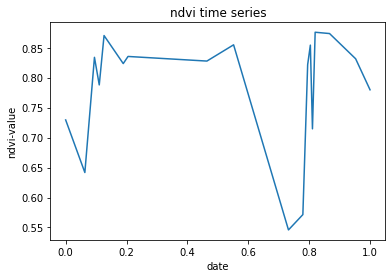

In [133]:
plt.plot(df_normalized['date'],df_normalized['mean'])

# Plot axes labels and show the plot
plt.title('ndvi time series')
plt.xlabel('date')
plt.ylabel('ndvi-value')
plt.show()

In [0]:
#please leave the below work as it is only done to explore gee with its api
#will make a seperate notebook soon

Below is some research work that i am looking on internet to find support for python api that is not exclusively supported

In [0]:
type(resultant_ndvi)

ee.imagecollection.ImageCollection

In [0]:
print(ee.Number(fi.get(2)))

ee.Number({
  "type": "Invocation",
  "arguments": {
    "object": {
      "type": "Invocation",
      "arguments": {
        "collection": {
          "type": "Invocation",
          "arguments": {
            "collection": {
              "type": "Invocation",
              "arguments": {
                "collection": {
                  "type": "Invocation",
                  "arguments": {
                    "collection": {
                      "type": "Invocation",
                      "arguments": {
                        "collection": {
                          "type": "Invocation",
                          "arguments": {
                            "collection": {
                              "type": "Invocation",
                              "arguments": {
                                "id": "LANDSAT/LC08/C01/T1_SR"
                              },
                              "functionName": "ImageCollection.load"
                            },
                    

In [0]:
var myFeatures = ee.FeatureCollection(valuesList.map(function(el){
el = ee.List(el) // cast every element of the list
var geom = ee.Geometry.Point([ee.Number(el.get(0)), 
ee.Number(el.get(1))])
return ee.Feature(geom, {'NDVI':ee.Number(el.get(2)), 
'SummaryQA':ee.Number(el.get(3))})

}))


SyntaxError: ignored

In [0]:
out = ee.batch.Export.table.toDrive({
  ' collection ' : e,
  ' description ' : 'exportTableExample',
  ' fileFormat ': 'CSV'

});


In [0]:
out.start()

EEException: ignored

In [0]:
composite = resultant_ndvi.qualityMosaic('NDVI').clip(cord);
print(composite);

ndviPalette = ['FFFFFF', 'CE7E45', 'DF923D', 'F1B555', 'FCD163', '99B718',
               '74A901', '66A000', '529400', '3E8601', '207401', '056201',
               '004C00', '023B01', '012E01', '011D01', '011301'];
Map.addLayer(composite.select('NDVI'),
            {min:0, max: 1,' palette': ndviPalette});

ee.Image({
  "type": "Invocation",
  "arguments": {
    "input": {
      "type": "Invocation",
      "arguments": {
        "collection": {
          "type": "Invocation",
          "arguments": {
            "collection": {
              "type": "Invocation",
              "arguments": {
                "collection": {
                  "type": "Invocation",
                  "arguments": {
                    "collection": {
                      "type": "Invocation",
                      "arguments": {
                        "collection": {
                          "type": "Invocation",
                          "arguments": {
                            "collection": {
                              "type": "Invocation",
                              "arguments": {
                                "collection": {
                                  "type": "Invocation",
                                  "arguments": {
                                    "id": "LANDSAT/LC08/C01/T1_SR

EEException: ignored

In [0]:

dem = ee.Image('USGS/SRTMGL1_003')

Image(url = clouds.median().updateMask(clouds.median())
  .getThumbUrl({'min': 0, 'max': 2000, 'dimensions': 512,
             }))

In [0]:
import google

ndviParams = {min: -1, max: 1}
my_map = folium.Map(location = [52,5],height=500,zoom_start  = 3)
my_map.add_ee_layer(im.updateMask(im), ndviParams, 'DEM')

# Add a layer control panel to the map.
my_map.add_child(folium.LayerControl())

# Display the map.
display(my_map)

In [0]:
folium.Map.add_ee_layer()

In [0]:
pip install paver

In [0]:
!paver.tasks.help


/bin/bash: paver.tasks.help: command not found


In [0]:
image_list = clouds.toList(clouds.size())

In [0]:
print(cord.get(a1))

ee.ComputedObject({
  "type": "Invocation",
  "arguments": {
    "object": {
      "type": "Invocation",
      "arguments": {
        "features": [
          {
            "type": "Invocation",
            "arguments": {
              "geometry": {
                "type": "Point",
                "coordinates": [
                  13.8463669499,
                  52.9008472902
                ]
              },
              "metadata": {
                "type": "Dictionary",
                "value": {
                  "label": "a1"
                }
              }
            },
            "functionName": "Feature"
          },
          {
            "type": "Invocation",
            "arguments": {
              "geometry": {
                "type": "Point",
                "coordinates": [
                  13.778028117,
                  52.951728864
                ]
              },
              "metadata": {
                "type": "Dictionary",
                "value": {
  

In [0]:
while out.active():
  print('Polling for task (id: {}).'.format(out.id))
  time.sleep(5)

Polling for task (id: WUYX4K6V5GVUBGR43R4KNH2V).
Polling for task (id: WUYX4K6V5GVUBGR43R4KNH2V).
Polling for task (id: WUYX4K6V5GVUBGR43R4KNH2V).


In [0]:
out.start()

In [0]:
geometry = ee.Geometry.Rectangle([116.2621, 39.8412, 116.4849, 40.01236])

In [0]:
out  = ee.batch.Export.image.toDrive(clouds,folder = 'aa')

In [0]:
out = ee.batch.Export.image.toDrive(image = band_image,folder = 'aa',maxPixels=3784216672400,region=roi)

In [0]:
out.status()

{'creation_timestamp_ms': 1584543777937,
 'description': 'myExportImageTask',
 'destination_uris': ['https://drive.google.com/#folders/1gIa7nL2cHDdVM4jZeM0vcrHhrNCVSMUF'],
 'id': 'EV2NC43UHOCKMJ7U42HTCKQA',
 'name': 'projects/earthengine-legacy/operations/EV2NC43UHOCKMJ7U42HTCKQA',
 'start_timestamp_ms': 1584543787901,
 'state': 'COMPLETED',
 'task_type': 'EXPORT_IMAGE',
 'update_timestamp_ms': 1584544379693}

In [0]:
im = clouds.first()

In [0]:
roi=ee.Feature(clouds.first()).geometry().bounds().getInfo()['coordinates']

In [0]:
roi

[[[13.296061712688171, 52.01734592815415],
  [16.789039403250097, 52.01734592815415],
  [16.789039403250097, 54.17227239140574],
  [13.296061712688171, 54.17227239140574],
  [13.296061712688171, 52.01734592815415]]]

In [0]:
im  =  clouds.first()

In [0]:
n = im.normalizedDifference(['B4','B5'])
band_image = im.add(n)

In [0]:
display(band_image)

In [0]:
Image(,format='jpg')

In [0]:
NDVI(im)

In [0]:
import ee.mapclient

In [0]:
map = ee.mapclient.centerMap(52,5,6)

In [0]:
imgndvi = clouds.first().normalizedDifference(['B5', 'B4']).rename('NDVI')

In [0]:
ndviParams = {min: -1, max: 1, 'palette': ['blue', 'white', 'green']};
Map.addLayer(imgndvi, ndviParams);

In [0]:
dislay(map)

NameError: ignored

In [0]:
Map = Map()

In [0]:
!pip install geetools

     |████████████████████████████████| 81kB 2.6MB/s 
     |████████████████████████████████| 225kB 8.4MB/s 
  Created wheel for geetools: filename=geetools-0.4.15-cp36-none-any.whl size=98234 sha256=7228c50bd98c416085f55fb3596a13f18e9ccc2f58ee8a577adaba1145196c12
  Stored in directory: /root/.cache/pip/wheels/a9/29/4b/8b23d7a814fd5b03acab81a0a721c4dc0d782fed28760b636a
  Created wheel for pyshp: filename=pyshp-2.1.0-cp36-none-any.whl size=32609 sha256=18a99afa9aea78874dda4f655cc2cf7028a4989ebe02403d6031f1e6d1e31372
  Stored in directory: /root/.cache/pip/wheels/a6/0c/de/321b5192ad416b328975a2f0385f72c64db4656501eba7cc1a
Successfully built geetools pyshp


In [0]:
pip install --upgrade geetools


Requirement already up-to-date: geetools in /usr/local/lib/python3.6/dist-packages (0.4.15)


In [0]:
from geetools import *

In [0]:
import geetoolvar myFeatures = ee.FeatureCollection(valuesList.map(function(el){
el = ee.List(el) // cast every element of the list
var geom = ee.Geometry.Point([ee.Number(el.get(0)), 
ee.Number(el.get(1))])
return ee.Feature(geom, {'NDVI':ee.Number(el.get(2)), 
'SummaryQA':ee.Number(el.get(3))})

}))


In [0]:
allBandMosaic = ee.ImageCollection('LANDSAT/LC08/C01/T1_TOA').filterDate('2016-03-01', '2016-11-30').select('B[0-7]').median();

#Var geometry = ee.Geometry.Rectangle([77, 17, 135, 56]);

#// Use the normalizedDifference(A, B) to compute (A - B) / (A + B)
ndvi = allBandMosaic.normalizedDifference(['B5', 'B4']);

palette = ['FFFFFF', 'CE7E45', 'DF923D', 'F1B555', 'FCD163', '99B718',
               '74A901', '66A000', '529400', '3E8601', '207401', '056201',
               '004C00', '023B01', '012E01', '011D01', '011301'];


#// Center the map
#Map.setCenter(103.16, 34.82, 8);

#// Display the input image and the NDVI derived from it.
#Map.addLayer(ndvi, {min: 0, max: 1, palette: palette}, 'NDVI');

#// Export the image, specifying scale and region.
#//Export.image.toDrive({
#//  image: ndvi,
#//  description: 'ndviToDriveExample',
#//  scale: 30,
#//  region: geometry
#//});
fc = ee.FeatureCollection('users/qiangsun/shengjie').filter(ee.Filter.stringContains('ENAME', 'Gansu'));
#Map.addLayer(fc,{color:'FF0000'},'shenjie');

means = ndvi.reduceRegions({
  'collection': fc,
  'reducer': ee.Reducer.mean(),
  'scale': 30,
});
means = means.get('ndvi')
print('gansu',means);

EEException: ignored

In [0]:
import geetools
import folium

In [0]:
geetools.Download

In [0]:
var ts = modis.map(function(image){
  var date = image.get('system:time_start');
  var mean = image.reduceRegion({
    reducer: ee.Reducer.mean(),
    geometry: watershed,
    scale: 250
  });
  // and return a feature with 'null' geometry with properties (dictionary)  
  return ee.Feature(null, {'mean': mean.get('NDVI'),
                            'date': date})
});

In [0]:
def tab_convert(image):
  date = image.get('system:time_start')
  mean = image.reduceRegion(reducer = ee.Reducer.mean(),maxPixels = 1e13,geometry = geometry)
  return ee.Feature(null, {'mean': mean.get('NDVI2'),
                            'date': date})

In [0]:
ts=clouds.map(tab_convert)

EEException: ignored

In [0]:
i  = clouds.first()

In [0]:
mean = i.reduceRegion(reducer = ee.Reducer.mean(),scale = 3,maxPixels = 1e13,geometry = geometry)

NameError: ignored

In [0]:
i.clip(cord)

In [0]:
out = mean.get('NDVI2')

In [0]:
f = ee.Feature(out)

In [0]:
task = ee.batch.Export.table.toDrive(collection=f,fileFormat='CSV')

In [0]:
task.start()


In [0]:
task.status()

{'creation_timestamp_ms': 1584868248432,
 'description': 'myExportTableTask',
 'error_message': 'Dictionary.get: Dictionary does not contain key: NDVI2.',
 'id': '7M7WR2ZQMQGUDKSOESPMD45J',
 'name': 'projects/earthengine-legacy/operations/7M7WR2ZQMQGUDKSOESPMD45J',
 'start_timestamp_ms': 1584868261121,
 'state': 'FAILED',
 'task_type': 'EXPORT_FEATURES',
 'update_timestamp_ms': 1584868261650}

In [0]:

var ft_col = onlyPrecipitation.map(function(img) {
    var date = img.get('system:time_start')
    var mean = img.reduceRegion({
        reducer: ee.Reducer.mean(),
        geometry: geometry,
        maxPixels: 1e13
    }).get('precipitation')
    return ee.Feature(null, { precipitation: mean, 'system:time_start': date })
})

SyntaxError: ignored